In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

C:\Users\krist\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\krist\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df = pd.read_csv('Dummy_data.csv')
df.drop(['customerid'],axis=1, inplace = True)
X = df.drop(['churn_Yes'],axis=1)
y = df['churn_Yes']
X.head()

,tenure,monthlycharges,totalcharges,gender_Male,seniorcitizen_Yes,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_Yes,onlinesecurity_Yes,...,internetservice_DSL,internetservice_Fiber optic,internetservice_No,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0


In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X = sc.fit_transform(X)


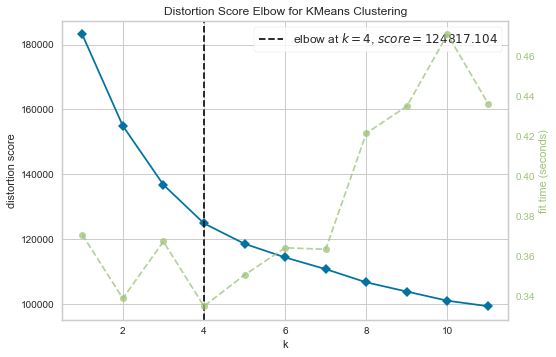

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [4]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(X)
visualizer.show()

In [5]:
from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(df)
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)

In [6]:
y_predicted = kmeans.fit_predict(X)
y_predicted

array([1, 1, 1, ..., 1, 2, 0])

In [7]:
df['cluster'] = y_predicted
df.head(20)

,tenure,monthlycharges,totalcharges,gender_Male,seniorcitizen_Yes,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_Yes,onlinesecurity_Yes,...,internetservice_Fiber optic,internetservice_No,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,cluster
0,1,29.85,29.85,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1,34,56.95,1889.50,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,1
2,2,53.85,108.15,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,1
3,45,42.30,1840.75,1,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
4,2,70.70,151.65,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,2
5,8,99.65,820.50,0,0,0,0,1,1,0,...,1,0,1,0,0,0,0,1,0,2
6,22,89.10,1949.40,1,0,0,1,1,1,0,...,1,0,1,0,0,0,1,0,0,2
7,10,29.75,301.90,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1
8,28,104.80,3046.05,0,0,1,0,1,1,0,...,1,0,1,0,0,0,0,1,0,2
9,62,56.15,3487.95,1,0,0,1,1,0,1,...,0,0,0,1,0,1,0,0,0,1


In [8]:
print(kmeans.labels_[:20])
print(len(kmeans.labels_))

[1 1 1 1 2 2 2 1 2 1 1 3 0 2 2 0 3 0 1 2]
7043


In [9]:
kmeans.cluster_centers_

array([[ 1.10472007e+00,  8.75252487e-01,  1.39130717e+00,
        -1.98468403e-02,  5.51376110e-03,  4.87717020e-01,
         2.01908626e-01,  1.60501118e-01,  5.69759672e-01,
         7.30728799e-01,  7.71978101e-01,  8.48319320e-01,
         8.25218869e-01,  7.72327752e-01,  7.77864291e-01,
         1.44095644e-01,  1.51316035e-01,  2.91738194e-01,
        -5.25927373e-01, -9.55958333e-01,  4.48392921e-01,
         6.85879711e-01,  3.40099413e-01,  3.48060076e-01,
        -2.79514634e-01, -3.61705417e-01],
       [-4.48229904e-01, -4.62961675e-01, -5.17461950e-01,
         1.05583244e-02, -1.46827497e-01, -2.38930479e-01,
        -5.86384672e-02, -8.62256747e-01, -5.45780121e-01,
         2.09370373e-01, -1.64294914e-02, -1.05070248e-01,
         1.38353323e-01, -2.57385905e-01, -2.36368092e-01,
        -8.55519824e-02,  1.38171215e+00, -8.85659760e-01,
        -5.25927373e-01,  3.26294324e-01,  1.40945179e-02,
        -3.93123767e-01, -1.14671413e-01, -8.75978305e-02,
        -3.54

In [10]:
kmeans.n_iter_

6

In [11]:
from collections import Counter
Counter(kmeans.labels_)

Counter({1: 1694, 2: 2080, 3: 1527, 0: 1742})

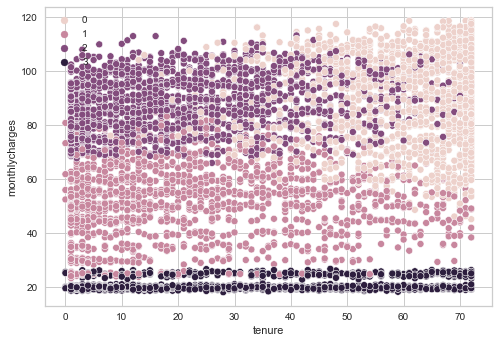

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x="tenure", y="monthlycharges", hue=kmeans.labels_)
plt.show()

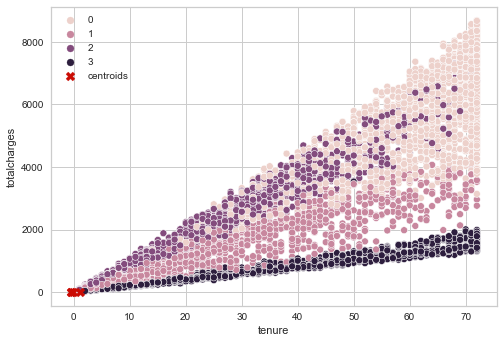

In [13]:
sns.scatterplot(data=df, x="tenure", y="totalcharges", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

## PCA

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(f'Explained variance ratio from PCA: {pca.explained_variance_ratio_}')

Explained variance ratio from PCA: [0.21452497 0.14163608]


In [15]:
principalDf

,principal component 1,principal component 2
0,-1.935605,-0.822851
1,-1.018371,1.656122
2,-1.918306,-0.354494
3,-0.058150,2.552012
4,-1.686940,-2.917961
...,...,...
7038,1.829668,1.628910
7039,4.146608,0.741146
7040,-1.838252,0.028810
7041,-1.243729,-2.203490


In [16]:
finalDf = pd.concat([principalDf, y], axis = 1)

In [17]:
finalDf

,principal component 1,principal component 2,churn_Yes
0,-1.935605,-0.822851,0
1,-1.018371,1.656122,0
2,-1.918306,-0.354494,1
3,-0.058150,2.552012,0
4,-1.686940,-2.917961,1
...,...,...,...
7038,1.829668,1.628910,0
7039,4.146608,0.741146,0
7040,-1.838252,0.028810,0
7041,-1.243729,-2.203490,1


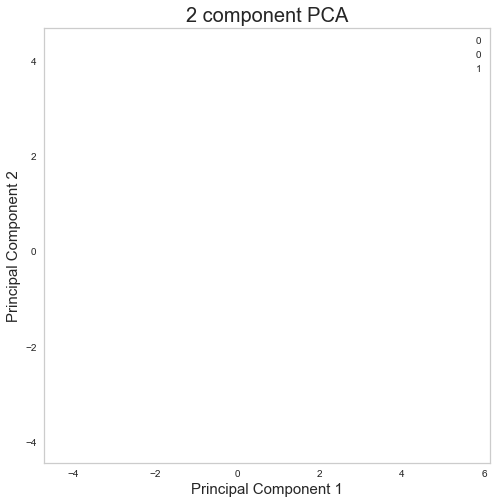

In [30]:
'''fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = y
colors = ['r','g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['churn_Yes'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = y.loc[indicesToKeep]
               , s = 50)
ax.legend(targets)
ax.grid()'''

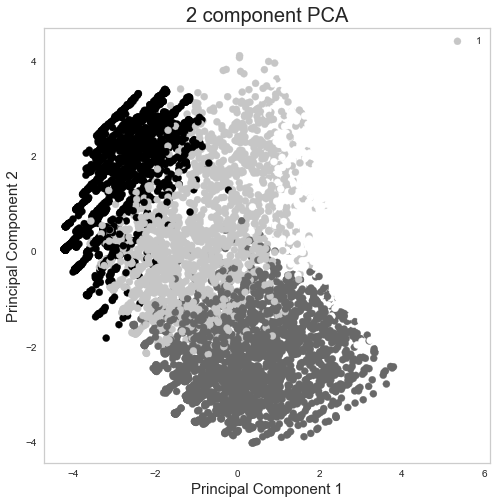

In [34]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter( finalDf['principal component 1']
            , finalDf['principal component 2']
            , c = kmeans.labels_
            , s = 50)
ax.legend(kmeans.labels_)
ax.grid()